NetPyNE tutorial http://doc.netpyne.org/tutorial.html#tutorial-4-using-a-simplified-cell-model-izhikevich

In [3]:
from neuron import h, load_mechanisms
from netpyne import specs, sim
import matplotlib.pyplot as plt
import os
import numpy as np

In [4]:
h.load_file("stdrun.hoc")

cwd = os.getcwd()
mod_dir = '/home/kedoxey/DCN_model/mod'
load_mechanisms(mod_dir)

True

## Single Cells

In [5]:
netParams = specs.NetParams()

In [6]:
izh_np = {'secs': {}}
izh_np['secs']['soma'] = {'geom': {}, 'pointps': {}}
izh_np['secs']['soma']['geom'] = {'diam': 10.0, 'L': 10.0, 'cm': 31.831}
izh_np['secs']['soma']['pointps']['Izhi'] = {
    'mod': 'Izhi2007b',
    'C': 1,
    'k': 0.7,
    'vr': -60,
    'vt': -40,
    'vpeak': 35,
    'a': 0.03,
    'b': -2,
    'c': -50, 
    'd': 100,
    'celltype': 1
}
netParams.cellParams['izh_np'] = izh_np

In [7]:
izh_dcn = {'secs': {}}
izh_dcn['secs']['soma'] = {'geom': {}, 'pointps': {}}                        # soma params dict
izh_dcn['secs']['soma']['geom'] = {'diam': 50, 'L': 50, 'cm': 1}    # soma geometry, cm = 31.831
izh_dcn['secs']['soma']['pointps']['Izhi'] = {                               # soma Izhikevich properties
    'mod':'Izhi2007b',
    'C':1,
    'k': 0.7,
    'vr':-60,
    'vt':-40,
    'vpeak':35,
    'a':0.03,
    'b':-2,
    'c':-50,
    'd':100,
    'celltype':1}
# IzhCell['secs']['soma']['threshold'] = -20
netParams.cellParams['izh_dcn'] = izh_dcn 

In [8]:
netParams.popParams['np'] = {'cellType': 'izh_np', 'numCells': 1}
netParams.popParams['dcn'] = {'cellType': 'izh_dcn', 'numCells': 1}


In [9]:
nsa_start = 200
nsa_dur = 500
nsa_freq = 20

netParams.synMechParams['exc_np'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 1.0, 'e': 0}  # NMDA
netParams.synMechParams['exc_dcn'] = {'mod': 'ExpSyn', 'tau': 0.2, 'e': 10}

netParams.popParams[f'vecstim_NSA'] = {
            'cellModel': 'VecStim',
            'numCells': 1,  # int(len(syn_secs)/4),
            'spikePattern': {'type': 'poisson',
                            'start': nsa_start,
                            'stop': nsa_start + nsa_dur,
                            'frequency': nsa_freq}  #  np.random.randint(params.spk_freq_lb, params.spk_freq_ub, 1)[0]}
        }

netParams.connParams[f'vecstim_NSA->np'] = {
    'preConds': {'pop': f'vecstim_NSA'},
    'postConds': {'pop': 'np'},
    'sec': 'soma',
    'synsPerConn': 1,
    'synMech': 'exc_np',
    'weight': 0.2,  # 
    # 'synMechWeightFactor': [0.5,0.5],
    'delay': 'defaultDelay + dist_2D/propVelocity',
    'probability': 1
    # 'connList': [[i,i] for i in range(1)]
    }

netParams.connParams[f'vecstim_NSA->dcn'] = {
    'preConds': {'pop': f'vecstim_NSA'},
    'postConds': {'pop': 'dcn'},
    'sec': 'soma',
    'synsPerConn': 1,
    'synMech': 'exc_dcn',
    'weight': 0.2,  # 
    # 'synMechWeightFactor': [0.5,0.5],
    'delay': 'defaultDelay + dist_2D/propVelocity',
    'probability': 1
    # 'connList': [[i,i] for i in range(1)]
    }



In [10]:
ic_delay = 400
ic_dur = 500
ic_start = nsa_start+nsa_dur+ic_delay
ic_amp = 0.1

netParams.stimSourceParams['Input_1'] = {'type': 'IClamp', 'del': ic_start, 'dur': ic_dur, 'amp': ic_amp}
netParams.stimTargetParams['Input_1->ALL'] = {'source': 'Input_1', 'sec':'soma', 'loc': 0.5, 'conds': {'pop': ['np', 'dcn']}}


In [11]:
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration
simConfig.duration = 2*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.001                # Internal integration timestep to use
simConfig.verbose = True           # Show detailed messages
simConfig.recordCells = ['all']
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.001            # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.recordStim = True
# simConfig.filename = 'tut4'         # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.hParams['celsius'] = 34.0 
# simConfig.analysis['plotRaster'] = {'saveFig': True}                  # Plot a raster
# simConfig.analysis['plotTraces'] = {'showFig': False, 'saveFig': False}  # Plot recorded traces for this list of cells
# simConfig.analysis['plot2Dnet'] = {'saveFig': True}             

In [12]:
(pops, cells, conns, stims, simData) = sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig, output=True)


Start time:  2025-03-18 12:26:01.270443

Creating network of 3 cell populations on 1 hosts...
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=0) of pop np, on node 0, 
Instantiated 1 cells of population np
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=1) of pop dcn, on node 0, 
Instantiated 1 cells of population dcn
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
    Error while setting 'spikePattern' param to VecStim[0]
Cell 0/0 (gid=2) of pop vecstim_NSA, on node 0, 
Instantiated 1 cells of population vecstim_NSA
  Number of cells on node 0: 3 
  Done; cell creation time = 0.00 s.
Making connections...
Generating set of probabilistic connections (rule: vecstim_NSA->np) ...
  Created connection preGid=2, postGid=0, sec=soma, loc=0.5, synMech=exc_np, weight=0.2, delay=1.06
Generating set of probabilistic connections (rule: vecstim_NSA->dcn) ...
  Created connection preGid=2, postGid=1, sec=soma, loc=0.5, syn

izh_np rates
    Poisson = 5.65 Hz
    IClamp = 13.22 Hz
izh_dcn rates
    Poisson = 5.65 Hz
    IClamp = 14.03 Hz


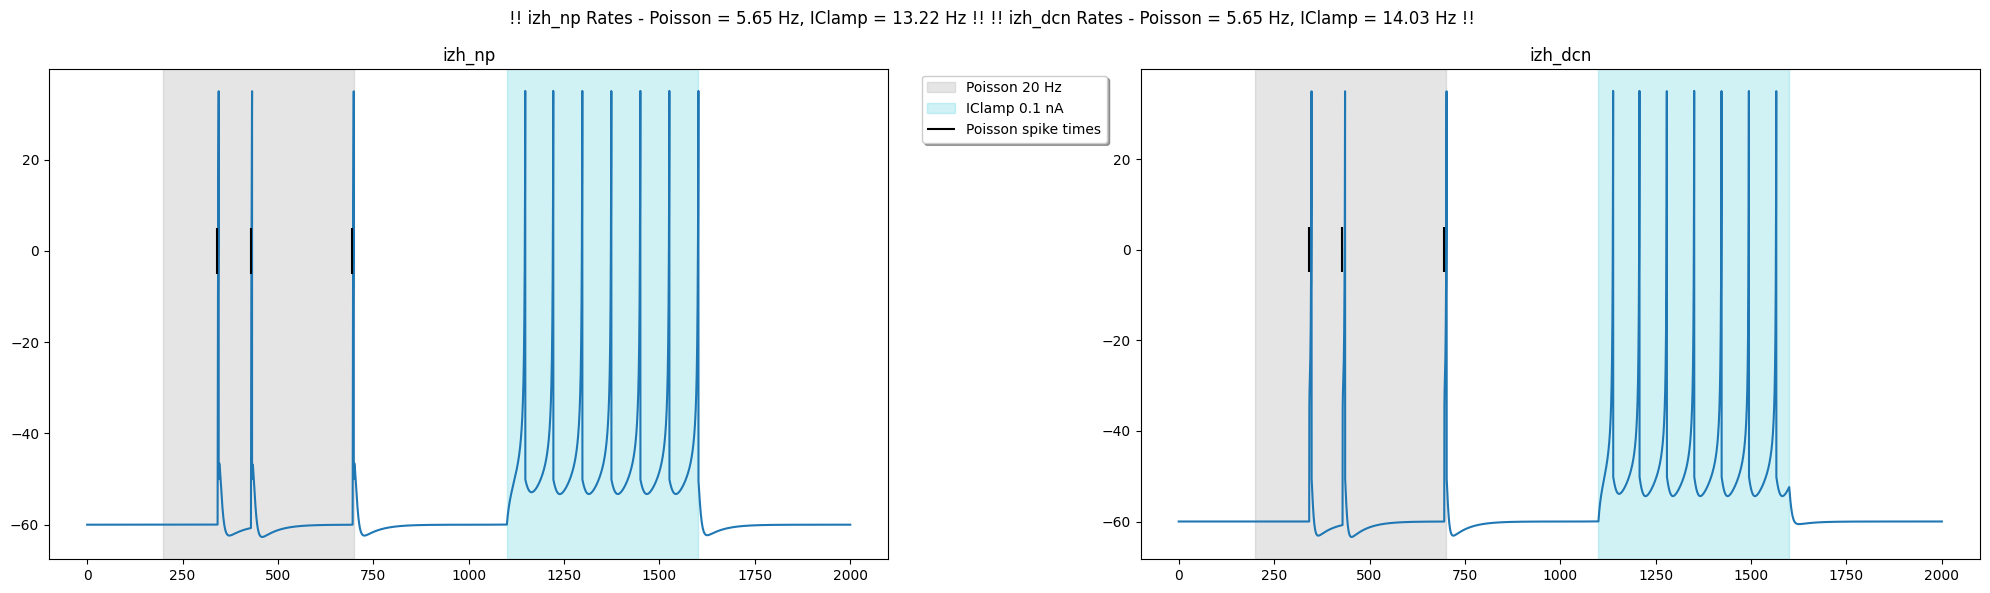

In [13]:
%matplotlib inline

num_cells = len(simData['V_soma'])

fig, axs = plt.subplots(1, num_cells, figsize=(20,6))
axs.ravel()

t = np.array(simData['t'])
spkt = np.array(simData['spkt'])
spkid = np.array(simData['spkid'])
nsa_times = spkt[np.where(spkid == 2)]

title = ''

for cell, trace in simData['V_soma'].items():

    gid = int(cell.split('_')[1])
    cell_type = cells[gid].tags['cellType']
    print(f'{cell_type} rates')

    nsa_spikes = spkt[np.where((spkt >= nsa_start) & (spkt <=nsa_start+nsa_dur+100) & (spkid == gid))]
    nsa_msf = round((len(nsa_spikes) - 1) / (nsa_spikes[-1] - nsa_spikes[0]) * 1000, 2)
    print(f'    Poisson = {nsa_msf} Hz')

    ic_spikes = spkt[np.where((spkt >= ic_start) & (spkt <=ic_start+ic_dur+100) & (spkid == gid))]
    ic_msf = round((len(ic_spikes) - 1) / (ic_spikes[-1] - ic_spikes[0]) * 1000, 2)
    print(f'    IClamp = {ic_msf} Hz')

    title += f'!! {cell_type} Rates - Poisson = {nsa_msf} Hz, IClamp = {ic_msf} Hz !! '

    axs[gid].plot(t, np.array(trace), zorder=12)
    axs[gid].set_title(f'{cell_type}')
    axs[gid].axvspan(nsa_start, nsa_start+nsa_dur, color='grey', alpha=0.2, zorder=0, label=f'Poisson {nsa_freq} Hz')
    axs[gid].axvspan(ic_start, ic_start+ic_dur, color='tab:cyan', alpha=0.2, zorder=0, label=f'IClamp {ic_amp} nA')
    axs[gid].vlines(nsa_times, ymin=-5, ymax=5, color='k', zorder=13, label='Poisson spike times')

axs[0].legend(loc='upper center', bbox_to_anchor=(1.15, 1),
        ncol=1, fancybox=True, shadow=True)

fig.suptitle(title)
fig.tight_layout()

## Connected Cells

### Excitatory

In [14]:
netParams = specs.NetParams()

#### Cells and Populations

In [15]:
izh_dcn = {'secs': {}}
izh_dcn['secs']['soma'] = {'geom': {}, 'pointps': {}}                        # soma params dict
izh_dcn['secs']['soma']['geom'] = {'diam': 50, 'L': 50, 'cm': 1}    # soma geometry, cm = 31.831
izh_dcn['secs']['soma']['pointps']['Izhi'] = {                               # soma Izhikevich properties
    'mod':'Izhi2007b',
    'C':1,
    'k': 0.7,
    'vr':-60,
    'vt':-40,
    'vpeak':35,
    'a':0.03,
    'b':-2,
    'c':-50,
    'd':100,
    'celltype':1}
# IzhCell['secs']['soma']['threshold'] = -20
netParams.cellParams['izh_dcn'] = izh_dcn 

izh_np = {'secs': {}}
izh_np['secs']['soma'] = {'geom': {}, 'pointps': {}}
izh_np['secs']['soma']['geom'] = {'diam': 10.0, 'L': 10.0, 'cm': 31.831}
izh_np['secs']['soma']['pointps']['Izhi'] = {
    'mod': 'Izhi2007b',
    'C': 1,
    'k': 0.7,
    'vr': -60,
    'vt': -40,
    'vpeak': 35,
    'a': 0.03,
    'b': -2,
    'c': -50, 
    'd': 100,
    'celltype': 1
}
netParams.cellParams['izh_np'] = izh_np

In [16]:
n_cells = 2
netParams.popParams['np'] = {'cellType': 'izh_np', 'numCells': n_cells}
netParams.popParams['dcn'] = {'cellType': 'izh_dcn', 'numCells': n_cells}

#### Inputs

In [17]:
nsa_start = 200
nsa_dur = 500
nsa_freq = 15

netParams.popParams[f'vecstim_NSA'] = {
            'cellModel': 'VecStim',
            'numCells': 1,  # int(len(syn_secs)/4),
            'spikePattern': {'type': 'poisson',
                            'start': nsa_start,
                            'stop': nsa_start + nsa_dur,
                            'frequency': nsa_freq}  #  np.random.randint(params.spk_freq_lb, params.spk_freq_ub, 1)[0]}
        }

netParams.connParams[f'vecstim_NSA->np'] = {
    'preConds': {'pop': f'vecstim_NSA'},
    'postConds': {'pop': 'np'},
    'sec': 'soma',
    'synsPerConn': 1,
    'synMech': 'exc_np',
    'weight': 0.2,  # 
    # 'synMechWeightFactor': [0.5,0.5],
    'delay': 'defaultDelay + dist_2D/propVelocity',
    # 'probability': 1
    'connList': [[0,0]]
    }

netParams.connParams[f'vecstim_NSA->dcn'] = {
    'preConds': {'pop': f'vecstim_NSA'},
    'postConds': {'pop': 'dcn'},
    'sec': 'soma',
    'synsPerConn': 1,
    'synMech': 'exc_dcn',
    'weight': 0.2,  # 
    # 'synMechWeightFactor': [0.5,0.5],
    'delay': 'defaultDelay + dist_2D/propVelocity',
    # 'probability': 1
    'connList': [[0,0]]
    }

In [18]:
ic_delay = 400
ic_dur = 500
ic_start = nsa_start+nsa_dur+ic_delay
ic_amp = 0.1

netParams.stimSourceParams['Input_1'] = {'type': 'IClamp', 'del': ic_start, 'dur': ic_dur, 'amp': ic_amp}
netParams.stimTargetParams['Input_1->ALL'] = {'source': 'Input_1', 'sec':'soma', 'loc': 0.5, 'conds': {'pop': ['np', 'dcn'], 'cellList': [n_cells*i for i in range(n_cells)]}}

#### Connectivity

In [19]:
netParams.synMechParams['exc_np'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 1.0, 'e': 0}  # NMDA
netParams.synMechParams['exc_dcn'] = {'mod': 'ExpSyn', 'tau': 0.2, 'e': 10}

netParams.connParams['np->np'] = {
    'preConds': {'pop': 'np'},
    'postConds': {'pop': 'np'},
    'synsPerConn': 1,
    'synMech': 'exc_np',
    'weight': 0.2,
    'connList': [[0,1]]
}

netParams.connParams['dcn->dcn'] = {
    'preConds': {'pop': 'dcn'},
    'postConds': {'pop': 'dcn'},
    'synsPerConn': 1,
    'synMech': 'exc_dcn',
    'weight': 0.2,
    'connList': [[0,1]]
}

#### Configuration

In [20]:
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration
simConfig.duration = 2*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.001                # Internal integration timestep to use
simConfig.verbose = True           # Show detailed messages
simConfig.recordCells = ['all']
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.001            # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.recordStim = True
# simConfig.filename = 'tut4'         # Set file output name
simConfig.savePickle = False 

#### Simulation

In [21]:
(pops, cells, conns, stims, simData) = sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig, output=True)


Start time:  2025-03-18 12:26:07.431611

Creating network of 3 cell populations on 1 hosts...
Distributed population of 2 cells on 1 hosts: {0: [0, 1]}, next: 0
Cell 0/1 (gid=0) of pop np, on node 0, 
Cell 1/1 (gid=1) of pop np, on node 0, 
Instantiated 2 cells of population np
Distributed population of 2 cells on 1 hosts: {0: [0, 1]}, next: 0
Cell 0/1 (gid=2) of pop dcn, on node 0, 
Cell 1/1 (gid=3) of pop dcn, on node 0, 
Instantiated 2 cells of population dcn
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
    Error while setting 'spikePattern' param to VecStim[1]
Cell 0/0 (gid=4) of pop vecstim_NSA, on node 0, 
Instantiated 1 cells of population vecstim_NSA
  Number of cells on node 0: 5 
  Done; cell creation time = 0.00 s.
Making connections...
Generating set of connections from list (rule: vecstim_NSA->np) ...
  Created connection preGid=4, postGid=0, sec=soma, loc=0.5, synMech=exc_np, weight=0.2, delay=1.15
Generating set of connections from list (rule: vecstim

np rates
cell 0
    Poisson = 19.59 Hz
    IClamp = 13.22 Hz
cell 1
    Poisson = 19.59 Hz
    IClamp = 13.22 Hz
dcn rates
cell 0
    Poisson = 19.59 Hz
    IClamp = 14.03 Hz
cell 1
    Poisson = 19.58 Hz
    IClamp = 14.01 Hz


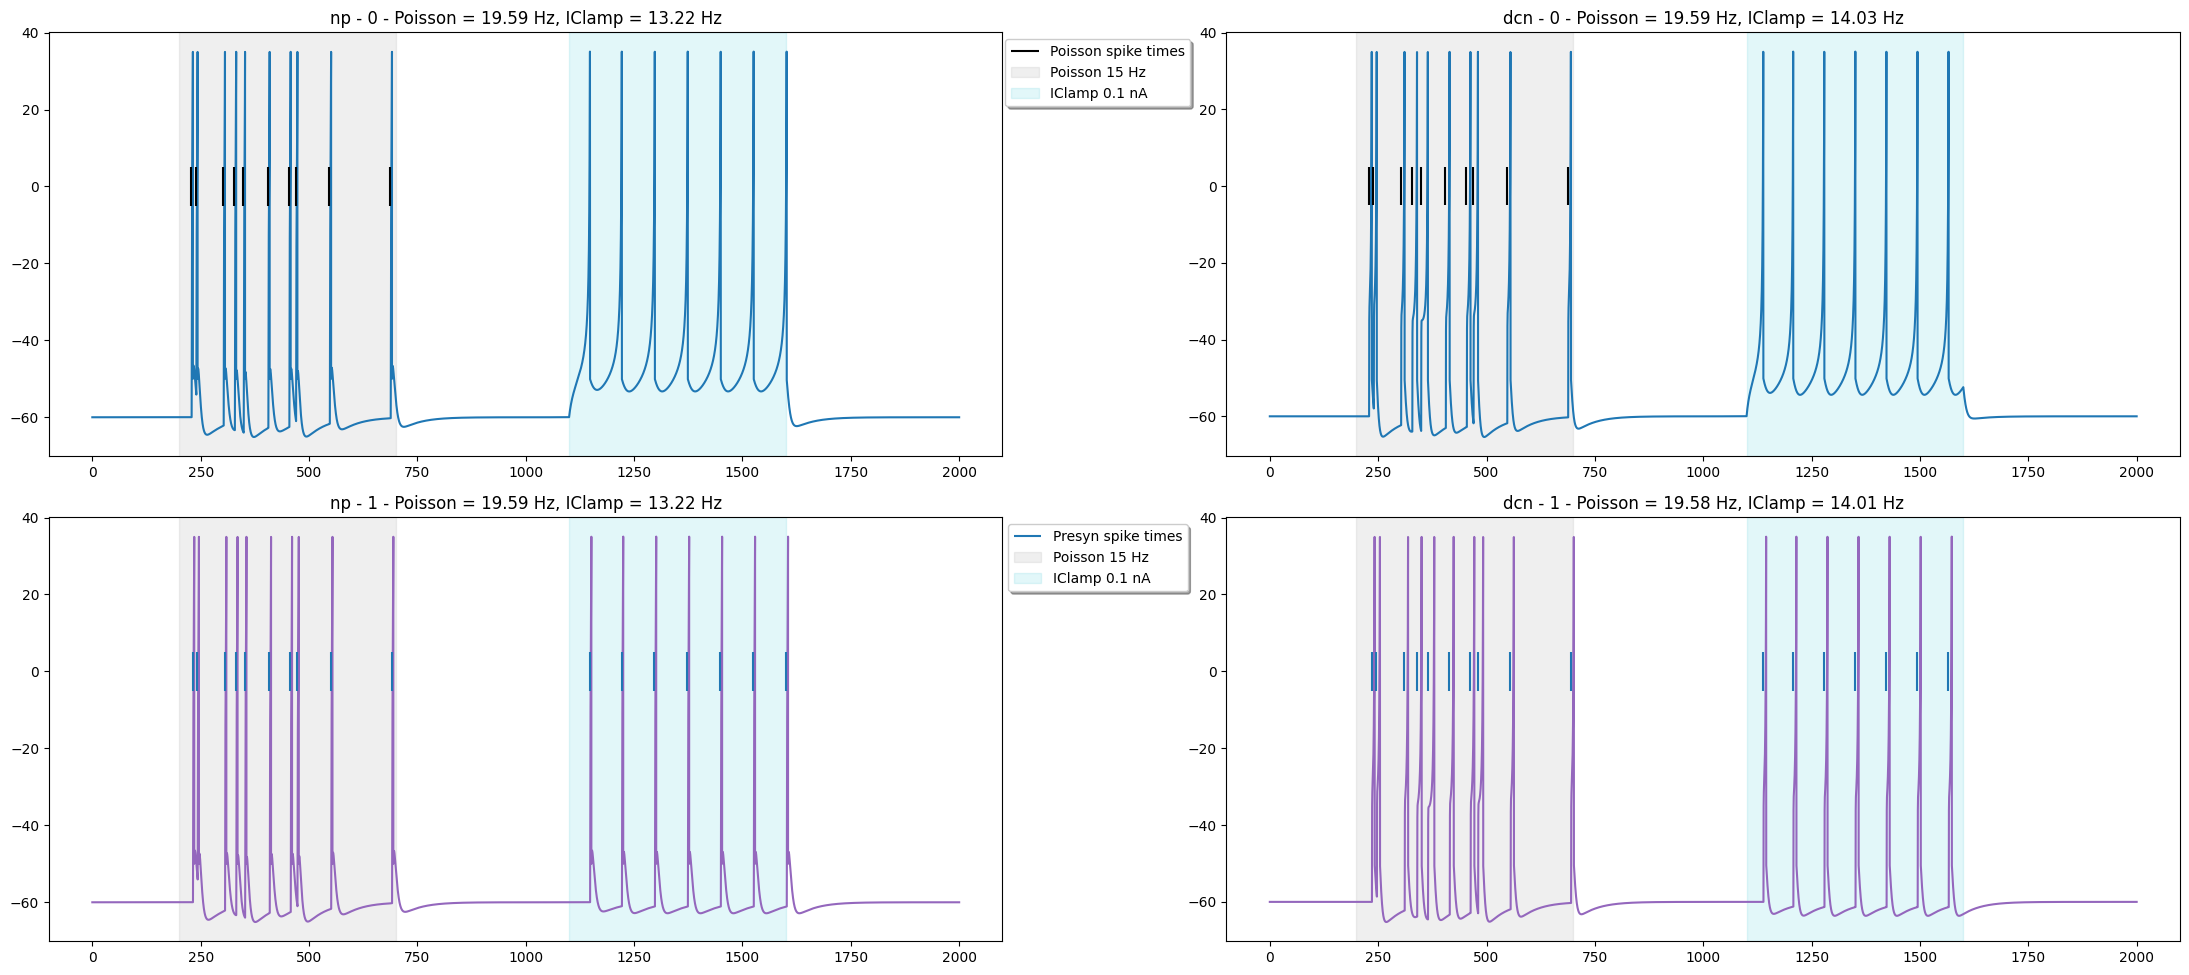

In [22]:
%matplotlib inline


fig, axs = plt.subplots(n_cells, len(pops)-1, figsize=(22,10))

t = np.array(simData['t'])
spkt = np.array(simData['spkt'])
spkid = np.array(simData['spkid'])
nsa_times = spkt[np.where(spkid == pops['vecstim_NSA'].cellGids[0])]

title = ''

for i_p, (pop_label, pop) in enumerate(pops.items()):

    if 'vecstim' in pop_label:
        continue
    
    print(f'{pop_label} rates')

    for i_c, gid in enumerate(pop.cellGids):

        rel_id = gid % n_cells

        v_soma = np.array(simData['V_soma'][f'cell_{gid}'])

        print(f'cell {rel_id}')

        nsa_spikes = spkt[np.where((spkt >= nsa_start) & (spkt <=nsa_start+nsa_dur+100) & (spkid == gid))]
        nsa_msf = round((len(nsa_spikes) - 1) / (nsa_spikes[-1] - nsa_spikes[0]) * 1000, 2) if len(nsa_spikes) > 0 else 0
        print(f'    Poisson = {nsa_msf} Hz')

        ic_spikes = spkt[np.where((spkt >= ic_start) & (spkt <=ic_start+ic_dur+100) & (spkid == gid))]
        ic_msf = round((len(ic_spikes) - 1) / (ic_spikes[-1] - ic_spikes[0]) * 1000, 2) if len(ic_spikes) > 0 else 0
        print(f'    IClamp = {ic_msf} Hz')

        ax = axs[i_c, i_p]

        if rel_id == 0:
            color = 'tab:blue'
            ax.vlines(nsa_times, ymin=-5, ymax=5, color='k', zorder=13, label='Poisson spike times')

        if rel_id == 1:
            color = 'tab:purple'
            ax.vlines(spkt[np.where(spkid == gid-1)], ymin=-5, ymax=5, color='tab:blue', zorder=13, label='Presyn spike times')

        ax.plot(t, v_soma, color=color)
        ax.set_title(f'{pop_label} - {rel_id} - Poisson = {nsa_msf} Hz, IClamp = {ic_msf} Hz')
        ax.axvspan(nsa_start, nsa_start+nsa_dur, color='grey', alpha=0.12, zorder=0, label=f'Poisson {nsa_freq} Hz')
        ax.axvspan(ic_start, ic_start+ic_dur, color='tab:cyan', alpha=0.12, zorder=0, label=f'IClamp {ic_amp} nA')


axs[0,0].legend(loc='upper center', bbox_to_anchor=(1.1, 1),
        ncol=1, fancybox=True, shadow=True)
axs[1,0].legend(loc='upper center', bbox_to_anchor=(1.1, 1),
        ncol=1, fancybox=True, shadow=True)


fig.suptitle(title)
fig.tight_layout()

### Excitatory + Inhibitory

In [23]:
netParams = specs.NetParams()

#### Cells and Populations

In [24]:
izh_dcn = {'secs': {}}
izh_dcn['secs']['soma'] = {'geom': {}, 'pointps': {}}                        # soma params dict
izh_dcn['secs']['soma']['geom'] = {'diam': 50, 'L': 50, 'cm': 1}    # soma geometry, cm = 31.831
izh_dcn['secs']['soma']['pointps']['Izhi'] = {                               # soma Izhikevich properties
    'mod':'Izhi2007b',
    'C':1,
    'k': 0.7,
    'vr':-60,
    'vt':-40,
    'vpeak':35,
    'a':0.03,
    'b':-2,
    'c':-50,
    'd':100,
    'celltype':1}
# IzhCell['secs']['soma']['threshold'] = -20
netParams.cellParams['izh_dcn'] = izh_dcn 

izh_np = {'secs': {}}
izh_np['secs']['soma'] = {'geom': {}, 'pointps': {}}
izh_np['secs']['soma']['geom'] = {'diam': 10.0, 'L': 10.0, 'cm': 31.831}
izh_np['secs']['soma']['pointps']['Izhi'] = {
    'mod': 'Izhi2007b',
    'C': 1,
    'k': 0.7,
    'vr': -60,
    'vt': -40,
    'vpeak': 35,
    'a': 0.03,
    'b': -2,
    'c': -50, 
    'd': 100,
    'celltype': 1
}
netParams.cellParams['izh_np'] = izh_np

In [25]:
n_cells = 3
n_pops = 2
netParams.popParams['np'] = {'cellType': 'izh_np', 'numCells': n_cells}
netParams.popParams['dcn'] = {'cellType': 'izh_dcn', 'numCells': n_cells}

#### Inputs

In [26]:
nsa_start = 200
nsa_dur = 500
nsa_freq = 15

netParams.popParams[f'vecstim_exc'] = {
            'cellModel': 'VecStim',
            'numCells': 1,  # int(len(syn_secs)/4),
            'spikePattern': {'type': 'poisson',
                            'start': nsa_start,
                            'stop': nsa_start + nsa_dur,
                            'frequency': nsa_freq}  # np.random.randint(params.spk_freq_lb, params.spk_freq_ub, 1)[0]}
        }

netParams.connParams[f'vecstim_exc->np'] = {
    'preConds': {'pop': f'vecstim_exc'},
    'postConds': {'pop': 'np'},
    'sec': 'soma',
    'synsPerConn': 1,
    'synMech': 'exc_np',
    'weight': 0.2,  # 
    # 'synMechWeightFactor': [0.5,0.5],
    'delay': 'defaultDelay + dist_2D/propVelocity',
    # 'probability': 1
    'connList': [[0,1]]  # [[0,0]]
    }

netParams.connParams[f'vecstim_exc->dcn'] = {
    'preConds': {'pop': f'vecstim_exc'},
    'postConds': {'pop': 'dcn'},
    'sec': 'soma',
    'synsPerConn': 1,
    'synMech': 'exc_dcn',
    'weight': 0.2,  # 
    # 'synMechWeightFactor': [0.5,0.5],
    'delay': 'defaultDelay + dist_2D/propVelocity',
    # 'probability': 1
    'connList': [[0,1]]  # [[0,0]]
    }

netParams.popParams[f'vecstim_inh'] = {
            'cellModel': 'VecStim',
            'numCells': 1,  # int(len(syn_secs)/4),
            'spikePattern': {'type': 'poisson',
                            'start': nsa_start,
                            'stop': nsa_start + nsa_dur,
                            'frequency': nsa_freq}  # np.random.randint(params.spk_freq_lb, params.spk_freq_ub, 1)[0]}
        }

netParams.connParams[f'vecstim_inh->np'] = {
    'preConds': {'pop': f'vecstim_inh'},
    'postConds': {'pop': 'np'},
    'sec': 'soma',
    'synsPerConn': 1,
    'synMech': 'exc_np',
    'weight': 0.2,  # 
    # 'synMechWeightFactor': [0.5,0.5],
    'delay': 'defaultDelay + dist_2D/propVelocity',
    # 'probability': 1
    'connList': [[0,0]]  # [[0,0]]
    }

netParams.connParams[f'vecstim_inh->dcn'] = {
    'preConds': {'pop': f'vecstim_inh'},
    'postConds': {'pop': 'dcn'},
    'sec': 'soma',
    'synsPerConn': 1,
    'synMech': 'exc_dcn',
    'weight': 0.2,  # 
    # 'synMechWeightFactor': [0.5,0.5],
    'delay': 'defaultDelay + dist_2D/propVelocity',
    # 'probability': 1
    'connList': [[0,0]]  # [[0,0]]
    }

In [27]:
ic_delay = 400
ic_dur = 500
ic_start = nsa_start+nsa_dur+ic_delay
ic_amp = 0.1

netParams.stimSourceParams['Input_1'] = {'type': 'IClamp', 'del': ic_start, 'dur': ic_dur, 'amp': ic_amp+0.05}
netParams.stimTargetParams['Input_1->inh'] = {'source': 'Input_1', 'sec':'soma', 'loc': 0.5, 'conds': {'cellList': [0, 3]}}  #[j+(n_cells*i) for i in range(n_cells-1) for j in range(n_pops)]}}  # [n_cells*i for i in range(n_pops)]}}

netParams.stimSourceParams['Input_2'] = {'type': 'IClamp', 'del': ic_start, 'dur': ic_dur, 'amp': ic_amp}
netParams.stimTargetParams['Input_2->exc'] = {'source': 'Input_2', 'sec':'soma', 'loc': 0.5, 'conds': {'cellList': [1, 4]}}  # [j+(n_cells*i) for i in range(n_cells-1) for j in range(n_pops)]}}  # [n_cells*i for i in range(n_pops)]}}


#### Connectivity

In [28]:
netParams.synMechParams['exc_np'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 1.0, 'e': 0}  
netParams.synMechParams['exc_dcn'] = {'mod': 'ExpSyn', 'tau': 0.2, 'e': 10}

netParams.synMechParams['inh_np'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 1.0, 'e': -80}  
netParams.synMechParams['inh_dcn'] = {'mod': 'ExpSyn', 'tau': 3, 'e': -70}

netParams.connParams['npE->np'] = {
    'preConds': {'pop': 'np'},
    'postConds': {'pop': 'np'},
    'synsPerConn': 1,
    'synMech': 'exc_np',
    'weight': 0.2,
    'connList': [[1,2]]
}

netParams.connParams['dcnE->dcn'] = {
    'preConds': {'pop': 'dcn'},
    'postConds': {'pop': 'dcn'},
    'synsPerConn': 1,
    'synMech': 'exc_dcn',
    'weight': 0.2,
    'connList': [[1,2]]
}

netParams.connParams['npI->np'] = {
    'preConds': {'pop': 'np'},
    'postConds': {'pop': 'np'},
    'synsPerConn': 1,
    'synMech': 'inh_np',
    'weight': 0.5,
    'connList': [[0,2]]
}

netParams.connParams['dcnI->dcn'] = {
    'preConds': {'pop': 'dcn'},
    'postConds': {'pop': 'dcn'},
    'synsPerConn': 1,
    'synMech': 'inh_dcn',
    'weight': 0.5,
    'connList': [[0,2]]
}

#### Configuration

In [29]:
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration
simConfig.duration = 2*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.001                # Internal integration timestep to use
simConfig.verbose = True           # Show detailed messages
simConfig.recordCells = ['all']
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.001            # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.recordStim = True
# simConfig.filename = 'tut4'         # Set file output name
simConfig.savePickle = False 

#### Simulation

In [30]:
(pops, cells, conns, stims, simData) = sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig, output=True)


Start time:  2025-03-18 12:26:15.231795

Creating network of 4 cell populations on 1 hosts...
Distributed population of 3 cells on 1 hosts: {0: [0, 1, 2]}, next: 0
Cell 0/2 (gid=0) of pop np, on node 0, 
Cell 1/2 (gid=1) of pop np, on node 0, 
Cell 2/2 (gid=2) of pop np, on node 0, 
Instantiated 3 cells of population np
Distributed population of 3 cells on 1 hosts: {0: [0, 1, 2]}, next: 0
Cell 0/2 (gid=3) of pop dcn, on node 0, 
Cell 1/2 (gid=4) of pop dcn, on node 0, 
Cell 2/2 (gid=5) of pop dcn, on node 0, 
Instantiated 3 cells of population dcn
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
    Error while setting 'spikePattern' param to VecStim[2]
Cell 0/0 (gid=6) of pop vecstim_exc, on node 0, 
Instantiated 1 cells of population vecstim_exc
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
    Error while setting 'spikePattern' param to VecStim[3]
Cell 0/0 (gid=7) of pop vecstim_inh, on node 0, 
Instantiated 1 cells of population vecstim_inh
  Numbe

np rates
cell 0
    Poisson = 19.43 Hz
    IClamp = 24.23 Hz
cell 1
    Poisson = 15.23 Hz
    IClamp = 13.22 Hz
cell 2
    Poisson = 15.22 Hz
    IClamp = 11.02 Hz
dcn rates
cell 0
    Poisson = 16.92 Hz
    IClamp = 26.34 Hz
cell 1
    Poisson = 15.1 Hz
    IClamp = 14.03 Hz
cell 2
    Poisson = 14.99 Hz
    IClamp = 7.06 Hz


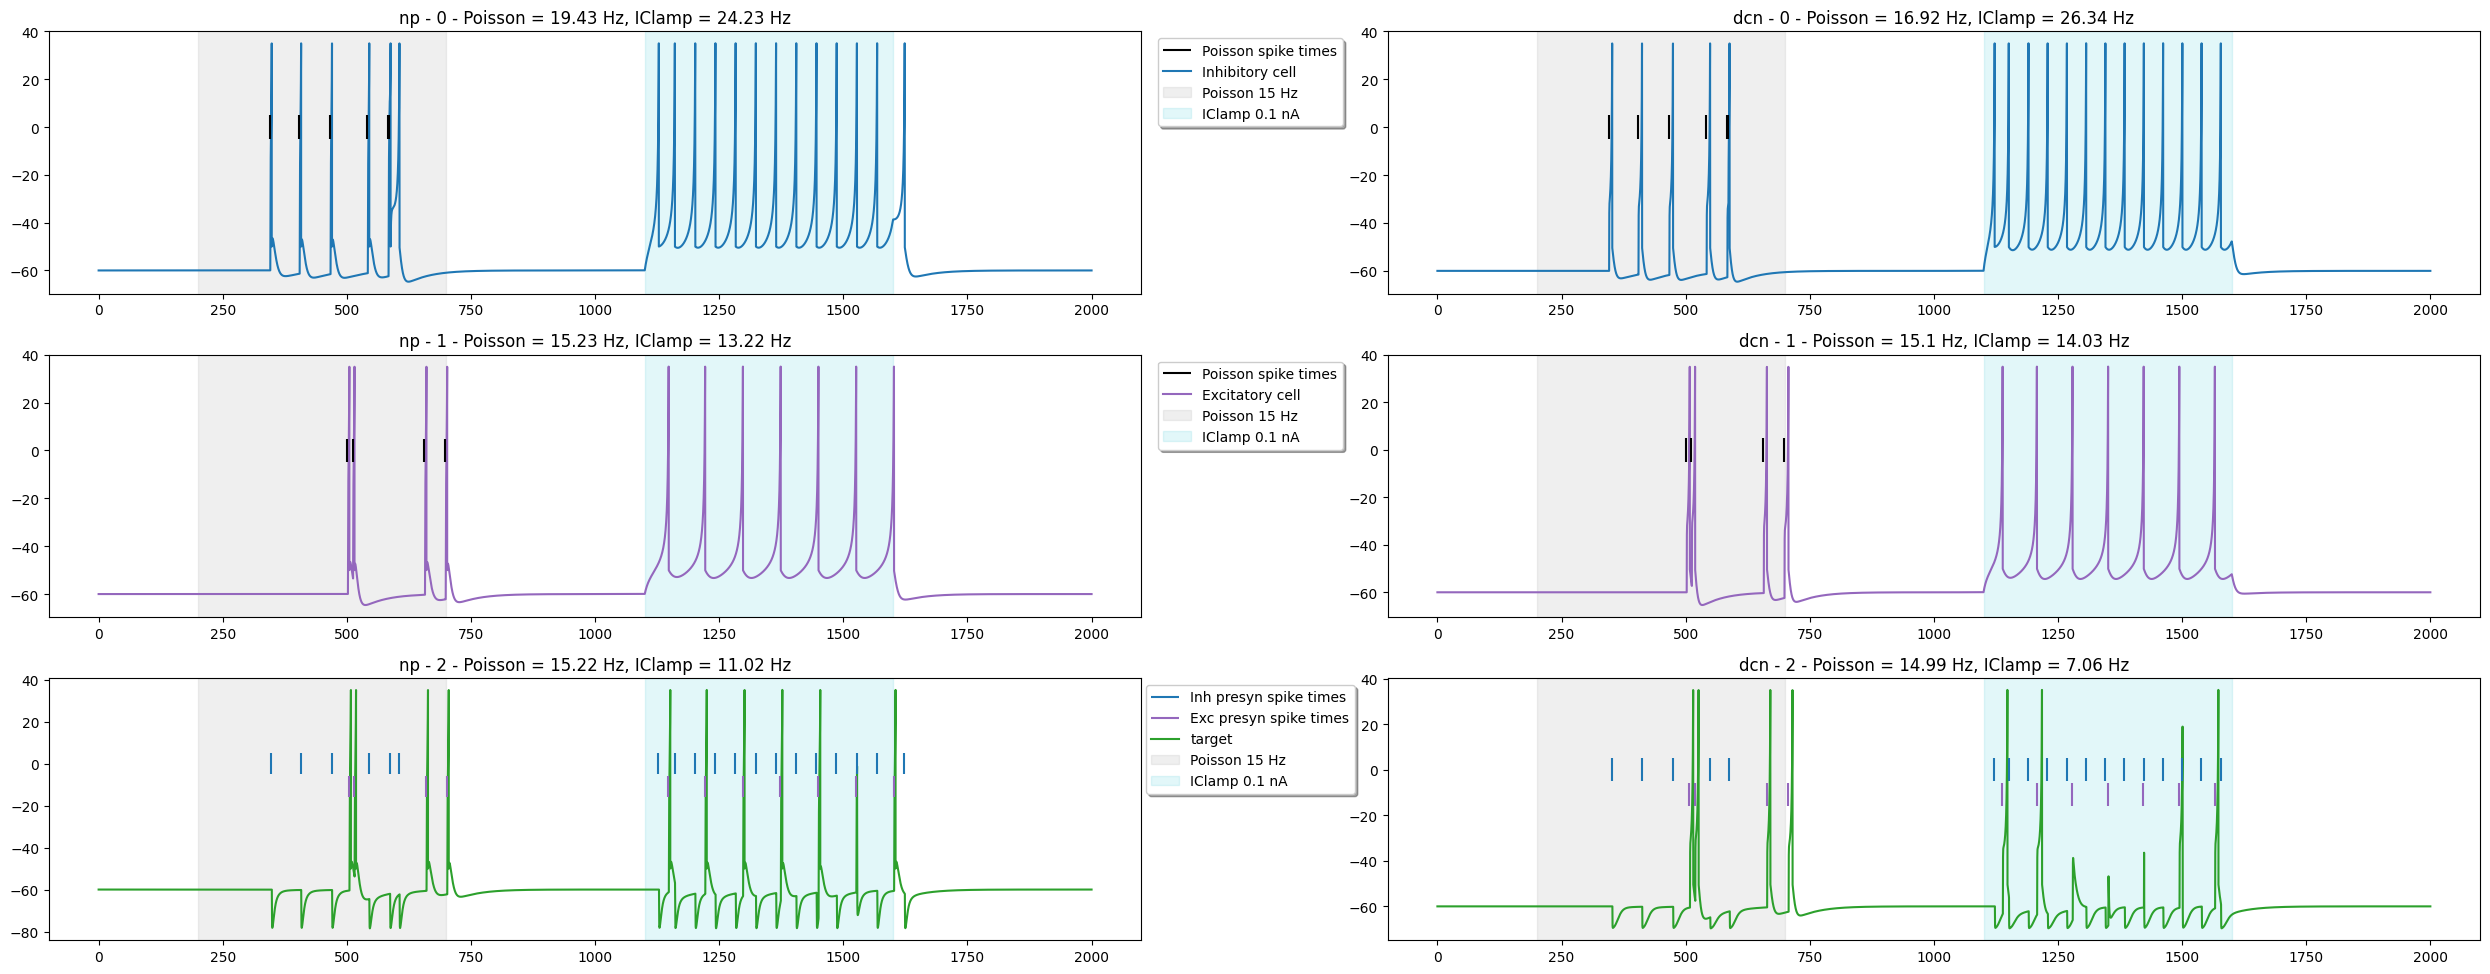

In [31]:
%matplotlib inline


fig, axs = plt.subplots(n_cells, n_pops, figsize=(25,10))

t = np.array(simData['t'])
spkt = np.array(simData['spkt'])
spkid = np.array(simData['spkid'])
exc_times = spkt[np.where(spkid == pops['vecstim_exc'].cellGids[0])]
inh_times = spkt[np.where(spkid == pops['vecstim_inh'].cellGids[0])]

title = ''

for i_p, (pop_label, pop) in enumerate(pops.items()):

    if 'vecstim' in pop_label:
        continue
    
    print(f'{pop_label} rates')

    for i_c, gid in enumerate(pop.cellGids):

        rel_id = gid % n_cells

        v_soma = np.array(simData['V_soma'][f'cell_{gid}'])

        print(f'cell {rel_id}')

        nsa_spikes = spkt[np.where((spkt >= nsa_start) & (spkt <=nsa_start+nsa_dur+100) & (spkid == gid))]
        nsa_msf = round((len(nsa_spikes) - 1) / (nsa_spikes[-1] - nsa_spikes[0]) * 1000, 2) if len(nsa_spikes) > 0 else 0
        print(f'    Poisson = {nsa_msf} Hz')

        ic_spikes = spkt[np.where((spkt >= ic_start) & (spkt <=ic_start+ic_dur+100) & (spkid == gid))]
        ic_msf = round((len(ic_spikes) - 1) / (ic_spikes[-1] - ic_spikes[0]) * 1000, 2) if len(ic_spikes) > 0 else 0
        print(f'    IClamp = {ic_msf} Hz')

        ax = axs[i_c, i_p]

        if rel_id == 0:
            color = 'tab:blue'
            label = 'Inhibitory cell'
            ax.vlines(inh_times, ymin=-5, ymax=5, color='k', zorder=13, label='Poisson spike times')

        if rel_id == 1:
            color = 'tab:purple'
            label = 'Excitatory cell'
            ax.vlines(exc_times, ymin=-5, ymax=5, color='k', zorder=13, label='Poisson spike times')
        
        if rel_id == 2:
            color = 'tab:green'
            label = 'target'
            ax.vlines(spkt[np.where(spkid == gid-2)], ymin=-5, ymax=5, color='tab:blue', zorder=13, label='Inh presyn spike times')
            ax.vlines(spkt[np.where(spkid == gid-1)], ymin=-16, ymax=-6, color='tab:purple', zorder=13, label='Exc presyn spike times')

        ax.plot(t, v_soma, color=color, label=label)
        ax.set_title(f'{pop_label} - {rel_id} - Poisson = {nsa_msf} Hz, IClamp = {ic_msf} Hz')
        ax.axvspan(nsa_start, nsa_start+nsa_dur, color='grey', alpha=0.12, zorder=0, label=f'Poisson {nsa_freq} Hz')
        ax.axvspan(ic_start, ic_start+ic_dur, color='tab:cyan', alpha=0.12, zorder=0, label=f'IClamp {ic_amp} nA')


        axs[i_c,0].legend(loc='upper center', bbox_to_anchor=(1.1, 1),
                ncol=1, fancybox=True, shadow=True)
# axs[2,0].legend(loc='upper center', bbox_to_anchor=(1.1, 1),
#         ncol=1, fancybox=True, shadow=True)


fig.suptitle(title)
fig.tight_layout()